In [0]:
import random 
import numpy as np
import pandas as pd
random.seed(42)  # don't change this line

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# Load all data tables
baseDir = '/content/drive/My Drive/' ## TODO: insert path to data file
df = pd.read_csv(baseDir+'NHANES-diabetes-hw-train.csv')

# Output debugging info
print(df.shape)
df.head()

(2070, 1812)


,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,DMQMILIZ,DMQADFC,DMDBORN4,DMDCITZN,DMDYRSUS,DMDEDUC3,DMDEDUC2,DMDMARTL,RIDEXPRG,SIALANG,SIAPROXY,SIAINTRP,FIALANG,FIAPROXY,FIAINTRP,MIALANG,MIAPROXY,MIAINTRP,AIALANGA,DMDHHSIZ,DMDFMSIZ,DMDHHSZA,DMDHHSZB,DMDHHSZE,DMDHRGND,DMDHRAGE,DMDHRBR4,DMDHREDU,DMDHRMAR,DMDHSEDU,...,SXQ280,SXQ292,SXQ294,WHD010,WHD020,WHQ030,WHQ040,WHD050,WHQ060,WHQ070,WHD080A,WHD080B,WHD080C,WHD080D,WHD080E,WHD080F,WHD080G,WHD080H,WHD080I,WHD080J,WHD080K,WHD080M,WHD080N,WHD080O,WHD080P,WHD080Q,WHD080R,WHD080S,WHD080T,WHD080U,WHD080L,WHD110,WHD120,WHD130,WHD140,WHQ150,WHQ030M,WHQ500,WHQ520,DIABETIC
0,76195,8,2,1,18,NaN,5,7,1.0,217.0,2.0,NaN,1,1.0,NaN,10.0,NaN,NaN,NaN,1,2.0,2,1.0,2.0,2.0,1.0,2.0,2.0,1.0,5,5,0,0,0,1,55,1.0,2.0,1.0,3.0,...,NaN,1.0,NaN,67.0,138.0,3.0,3.0,120.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,138.0,18.0,NaN,NaN,NaN,0.0
1,76958,8,2,2,57,NaN,2,2,1.0,NaN,2.0,NaN,1,1.0,NaN,NaN,3.0,1.0,NaN,1,2.0,2,1.0,2.0,2.0,1.0,2.0,2.0,1.0,6,6,1,0,1,1,27,1.0,4.0,6.0,NaN,...,NaN,NaN,1.0,67.0,142.0,3.0,2.0,150.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,135.0,115.0,67.0,150.0,45.0,NaN,NaN,NaN,0.0
2,80248,8,2,2,29,NaN,2,2,2.0,NaN,2.0,NaN,1,1.0,NaN,NaN,4.0,1.0,2.0,1,2.0,2,1.0,2.0,2.0,1.0,2.0,2.0,1.0,3,3,1,0,0,2,29,1.0,4.0,1.0,5.0,...,NaN,NaN,1.0,67.0,137.0,3.0,2.0,150.0,1.0,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,32.0,NaN,34.0,30.0,41.0,NaN,43.0,NaN,45.0,46.0,NaN,NaN,NaN,125.0,NaN,160.0,28.0,NaN,NaN,NaN,0.0
3,80213,8,2,2,0,5.0,1,1,2.0,6.0,NaN,NaN,1,1.0,NaN,NaN,NaN,NaN,NaN,1,1.0,2,1.0,2.0,2.0,NaN,NaN,NaN,NaN,5,5,1,0,0,1,33,1.0,4.0,1.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,76753,8,2,1,61,NaN,3,3,2.0,NaN,2.0,NaN,1,1.0,NaN,NaN,3.0,6.0,NaN,1,2.0,2,1.0,2.0,2.0,1.0,2.0,2.0,1.0,6,6,0,0,2,2,52,1.0,4.0,6.0,NaN,...,NaN,NaN,NaN,69.0,160.0,2.0,1.0,160.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160.0,160.0,69.0,180.0,30.0,NaN,NaN,NaN,0.0


In [0]:
# Print information about the dataset
print('Percentage of instances with missing features:')
print(df.isnull().sum(axis=0)/df.shape[0])
print()
print('Class information:')
print(df['DIABETIC'].value_counts())

Percentage of instances with missing features:
SEQN        0.000000
SDDSRVYR    0.000000
RIDSTATR    0.000000
RIAGENDR    0.000000
RIDAGEYR    0.000000
              ...   
WHQ150      0.400483
WHQ030M     0.852657
WHQ500      0.852657
WHQ520      0.852657
DIABETIC    0.000483
Length: 1812, dtype: float64

Class information:
0.0    1891
1.0     178
Name: DIABETIC, dtype: int64


## **Preprocessing**

The first key step in any data modeling task is cleaning your dataset. Explore your dataset and figure out what sort of preprocessing is required. Good preprocessing can make or break your final model. So choose wisely.

Some of the preprocessing steps that you can consider are :


*   One-hot encoding of variables
*   Missing value imputation
*   Removing outliers
*   Converting binary features into 0-1 representation


Feel free to reuse code you've already written in HW 0.






In [0]:
# TODO Insert your preprocessing code here

In [0]:
# Dataframe manipulation methods from hw0

def getMissingRatio(inputDf):
    
    features_lst = list(inputDf.columns)
    missing_percent_lst = []

    for column in inputDf:
      null_df = inputDf[column].isnull()
      num_of_null = null_df[null_df == True].count()
      total_rows = len(inputDf)
      missing_percent = num_of_null / total_rows
      missing_percent_lst.append(missing_percent)
    
    dataframe = {'Feature': features_lst, 'MissingPercent': missing_percent_lst}
    outDf = pd.DataFrame(dataframe)
    
    return outDf

def convertToBinary(inputDf, feature):

    outDf = inputDf.copy()
    null_df = outDf[feature].isnull()
    unique_items = outDf[feature].unique()

    if null_df[null_df == True].count() > 0:
      if len(unique_items) == 3:
        mapping = {unique_items[0]: 0, unique_items[1]: 1}
        outDf[feature] = outDf[feature].map(mapping)
        return outDf
        
    else:
      if len(unique_items) == 2:
        mapping = {unique_items[0]: 0, unique_items[1]: 1}
        outDf[feature] = outDf[feature].map(mapping)
        return outDf
    
    return outDf

In [0]:
# Function to preprocess given dataframe
def preprocess_df1(input_df):

  # # Call getMissingRatio and create new df with columns < 5% null values
  missing_ratio_df = getMissingRatio(input_df)
  keep_df = missing_ratio_df[missing_ratio_df['MissingPercent'] < 0.4]

  # # Store rows of keep_df into list of columns
  col_lst = []
  for index, row in keep_df.iterrows():
    col_lst.append(row['Feature'])

  # Create new df from new list above 
  # output_df = input_df[col_lst].dropna()
  output_df = input_df[col_lst]

  # Fill null values with mean/mode of column and store in dict for future use
  fill_dict = {}
  for col in output_df.columns[:-1]:
    try:
      fill = output_df[col].mean()
      output_df[col].fillna(fill,inplace=True)
      fill_dict[col] = fill
    except:
      fill = output_df[col].mode()[0]
      output_df[col].fillna(fill,inplace=True)
      fill_dict[col] = fill

  # Drop any column with only 1 value
  for col in output_df.columns:
    if len(output_df[col].unique()) == 1:
      output_df.drop(col,inplace=True,axis=1)
  
  # Convert columns with binary features into 0-1 representation
  binary_lst = []
  for col in output_df.columns:
    if len(output_df[col].unique()) == 2:
      output_df = convertToBinary(output_df, col)
      binary_lst.append(col)

  return output_df, binary_lst, fill_dict

In [0]:
# Preprocessing original df
df1, binary_lst, fill_dict = preprocess_df1(df)
display(df1)
print(binary_lst)
print(fill_dict)
print(len(fill_dict))

# Show value counts of all columns
# This will give us general distribution and if there are outliers
# And will tell us if we need to perform any additional preprocessing
for col in df1:
  print(df1[col].value_counts())

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,SEQN,RIDSTATR,RIAGENDR,RIDAGEYR,RIDRETH1,RIDRETH3,RIDEXMON,DMQMILIZ,DMDBORN4,DMDCITZN,SIALANG,SIAPROXY,SIAINTRP,FIALANG,FIAPROXY,FIAINTRP,MIALANG,MIAPROXY,MIAINTRP,AIALANGA,DMDHHSIZ,DMDFMSIZ,DMDHHSZA,DMDHHSZB,DMDHHSZE,DMDHRGND,DMDHRAGE,DMDHRBR4,DMDHREDU,DMDHRMAR,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR,URXUMA,URXUMS,URXUCR.x,...,OCD390G,OHQ030,OHQ033,OHQ770,OHQ845,PAQ605,PAQ620,PAQ635,PAQ650,PAQ665,PAD680,PAQ710,PAQ715,PAAQUEX,PUQ100,PUQ110,SLD010H,SLQ050,SLQ060,SMQ020,SMAQUEX2,SMD460,SMQ856,SMQ860,SMQ866,SMQ870,SMQ872,SMQ874,SMQ878,SMAQUEX.x,SMQ681,SMQ851,SMAQUEX.y,WHD010,WHD020,WHQ030,WHQ040,WHD050,WHD140,DIABETIC
0,76195,0,0,18,5,7,1.0,2.000000,1,1.0,0,0,0,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,5,5,0,0,0,0,55,1.000000,2.000000,1.0,14376.087470,14276.370446,2.000000,116.000000,7.000000,7.000000,1.520000,235.000000,235.000000,170.000000,...,4.000000,5.000000,1.000000,2.000000,3.0,2.000000,1.000000,1.000000,1.000000,2.000000,720.00000,2.000000,1.000000,1.000000,2.000000,2.000000,8.000000,2.000000,2.000000,2.000000,1.000000,0.000000,2.000000,2.000000,2.000000,1.00000,2.000000,1.000000,1.00000,2.000000,2.000000,2.000000,2.000000,67.000000,138.000000,3.000000,3.000000,120.000000,138.000000,0.0
1,76958,0,1,57,2,2,1.0,2.000000,1,1.0,0,0,0,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,6,6,1,0,1,0,27,1.000000,4.000000,6.0,19525.577529,20416.919012,1.000000,108.000000,14.000000,14.000000,3.090000,1.200000,1.200000,42.000000,...,1.000000,5.000000,1.000000,2.000000,3.0,2.000000,2.000000,2.000000,2.000000,2.000000,600.00000,3.000000,0.000000,1.000000,2.000000,2.000000,7.000000,2.000000,2.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000,1.00000,2.000000,1.000000,1.00000,2.000000,2.000000,2.000000,2.000000,67.000000,142.000000,3.000000,2.000000,150.000000,150.000000,0.0
2,80248,0,1,29,2,2,2.0,2.000000,1,1.0,0,0,0,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,3,3,1,0,0,1,29,1.000000,4.000000,1.0,29996.753350,33448.963277,1.000000,104.000000,15.000000,15.000000,5.000000,1.900000,1.900000,47.000000,...,1.000000,4.000000,3.000000,2.000000,3.0,2.000000,2.000000,2.000000,2.000000,2.000000,180.00000,1.000000,1.000000,1.000000,2.000000,2.000000,8.000000,2.000000,2.000000,1.000000,1.000000,0.000000,2.000000,2.000000,2.000000,2.00000,1.851636,1.000000,2.00000,2.000000,2.000000,2.000000,2.000000,67.000000,137.000000,3.000000,2.000000,150.000000,160.000000,0.0
3,80213,0,1,0,1,1,2.0,1.923017,1,1.0,0,1,0,1.000000,2.000000,2.000000,1.058116,1.992652,1.967936,1.113464,5,5,1,0,0,0,33,1.000000,4.000000,1.0,6631.892457,6784.984267,1.000000,107.000000,15.000000,15.000000,5.000000,43.855012,43.855012,124.386308,...,1.656796,2.774372,1.878075,1.850267,2.7,1.836314,1.669876,1.718513,1.718513,1.556474,473.62164,2.451898,3.186167,1.073978,1.910176,2.032663,6.895976,1.761002,1.937026,1.577689,1.139822,0.000000,1.476494,1.000000,1.897211,1.00000,2.000000,2.000000,2.00000,3.000000,1.805027,1.984006,1.855524,142.102818,256.217391,1.954476,2.215478,320.032086,268.961722,0.0
4,76753,0,0,61,3,3,2.0,2.000000,1,1.0,0,0,0,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,6,6,0,0,2,1,52,1.000000,4.000000,6.0,18397.696565,18470.244689,2.000000,105.000000,10.000000,10.000000,2.130000,37.000000,37.000000,153.000000,...,2.000000,6.000000,3.000000,1.000000,5.0,2.000000,1.000000,2.000000,2.000000,2.000000,540.00000,3.000000,8.000000,1.000000,2.000000,2.000000,6.000000,1.000000,2.000000,1.000000,1.000000,0.000000,1.000000,2.000000,2.000000,1.00000,1.000000,2.000000,1.00000,2.000000,1.000000,2.000000,2.000000,69.000000,160.000000,2.000000,1.000000,160.000000,180.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

['RIDSTATR', 'RIAGENDR', 'SIALANG', 'SIAPROXY', 'SIAINTRP', 'DMDHRGND']
{'SEQN': 78614.28792270532, 'SDDSRVYR': 8.0, 'RIDSTATR': 1.9603864734299516, 'RIAGENDR': 1.5236714975845411, 'RIDAGEYR': 31.423188405797102, 'RIDRETH1': 3.1033816425120775, 'RIDRETH3': 3.307729468599034, 'RIDEXMON': 1.5085513078470825, 'DMQMILIZ': 1.9230171073094868, 'DMDBORN4': 1.2367149758454106, 'DMDCITZN': 1.1028985507246376, 'SIALANG': 1.1053140096618357, 'SIAPROXY': 1.6376811594202898, 'SIAINTRP': 1.9647342995169081, 'FIALANG': 1.0609037328094302, 'FIAPROXY': 1.9995088408644401, 'FIAINTRP': 1.9670923379174852, 'MIALANG': 1.0581162324649298, 'MIAPROXY': 1.9926519706078825, 'MIAINTRP': 1.967935871743487, 'AIALANGA': 1.113464447806354, 'DMDHHSIZ': 3.9318840579710144, 'DMDFMSIZ': 3.7830917874396137, 'DMDHHSZA': 0.5468599033816425, 'DMDHHSZB': 1.0449275362318842, 'DMDHHSZE': 0.39710144927536234, 'DMDHRGND': 1.511111111111111, 'DMDHRAGE': 46.14154589371981, 'DMDHRBR4': 1.3371456986573844, 'DMDHREDU': 3.453777335984

In [0]:
# Check if any null values left over
null_columns = df1.columns[df1.isnull().any()]
df1[null_columns].isnull().sum()

DIABETIC    1
dtype: int64

In [0]:
# Remove last item without label
df1 = df1.iloc[:-1]
df1

,SEQN,RIDSTATR,RIAGENDR,RIDAGEYR,RIDRETH1,RIDRETH3,RIDEXMON,DMQMILIZ,DMDBORN4,DMDCITZN,SIALANG,SIAPROXY,SIAINTRP,FIALANG,FIAPROXY,FIAINTRP,MIALANG,MIAPROXY,MIAINTRP,AIALANGA,DMDHHSIZ,DMDFMSIZ,DMDHHSZA,DMDHHSZB,DMDHHSZE,DMDHRGND,DMDHRAGE,DMDHRBR4,DMDHREDU,DMDHRMAR,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR,URXUMA,URXUMS,URXUCR.x,...,OCD390G,OHQ030,OHQ033,OHQ770,OHQ845,PAQ605,PAQ620,PAQ635,PAQ650,PAQ665,PAD680,PAQ710,PAQ715,PAAQUEX,PUQ100,PUQ110,SLD010H,SLQ050,SLQ060,SMQ020,SMAQUEX2,SMD460,SMQ856,SMQ860,SMQ866,SMQ870,SMQ872,SMQ874,SMQ878,SMAQUEX.x,SMQ681,SMQ851,SMAQUEX.y,WHD010,WHD020,WHQ030,WHQ040,WHD050,WHD140,DIABETIC
0,76195,0,0,18,5,7,1.0,2.000000,1,1.0,0,0,0,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,5,5,0,0,0,0,55,1.000000,2.000000,1.0,14376.087470,14276.370446,2.0,116.0,7.000000,7.000000,1.520000,235.000000,235.000000,170.000000,...,4.000000,5.000000,1.000000,2.000000,3.0,2.000000,1.000000,1.000000,1.000000,2.000000,720.00000,2.000000,1.000000,1.000000,2.000000,2.000000,8.000000,2.000000,2.000000,2.000000,1.000000,0.000000,2.000000,2.0,2.000000,1.0,2.000000,1.0,1.0,2.0,2.000000,2.000000,2.000000,67.000000,138.000000,3.000000,3.000000,120.000000,138.000000,0.0
1,76958,0,1,57,2,2,1.0,2.000000,1,1.0,0,0,0,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,6,6,1,0,1,0,27,1.000000,4.000000,6.0,19525.577529,20416.919012,1.0,108.0,14.000000,14.000000,3.090000,1.200000,1.200000,42.000000,...,1.000000,5.000000,1.000000,2.000000,3.0,2.000000,2.000000,2.000000,2.000000,2.000000,600.00000,3.000000,0.000000,1.000000,2.000000,2.000000,7.000000,2.000000,2.000000,1.000000,1.000000,0.000000,1.000000,1.0,2.000000,1.0,2.000000,1.0,1.0,2.0,2.000000,2.000000,2.000000,67.000000,142.000000,3.000000,2.000000,150.000000,150.000000,0.0
2,80248,0,1,29,2,2,2.0,2.000000,1,1.0,0,0,0,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,3,3,1,0,0,1,29,1.000000,4.000000,1.0,29996.753350,33448.963277,1.0,104.0,15.000000,15.000000,5.000000,1.900000,1.900000,47.000000,...,1.000000,4.000000,3.000000,2.000000,3.0,2.000000,2.000000,2.000000,2.000000,2.000000,180.00000,1.000000,1.000000,1.000000,2.000000,2.000000,8.000000,2.000000,2.000000,1.000000,1.000000,0.000000,2.000000,2.0,2.000000,2.0,1.851636,1.0,2.0,2.0,2.000000,2.000000,2.000000,67.000000,137.000000,3.000000,2.000000,150.000000,160.000000,0.0
3,80213,0,1,0,1,1,2.0,1.923017,1,1.0,0,1,0,1.000000,2.000000,2.000000,1.058116,1.992652,1.967936,1.113464,5,5,1,0,0,0,33,1.000000,4.000000,1.0,6631.892457,6784.984267,1.0,107.0,15.000000,15.000000,5.000000,43.855012,43.855012,124.386308,...,1.656796,2.774372,1.878075,1.850267,2.7,1.836314,1.669876,1.718513,1.718513,1.556474,473.62164,2.451898,3.186167,1.073978,1.910176,2.032663,6.895976,1.761002,1.937026,1.577689,1.139822,0.000000,1.476494,1.0,1.897211,1.0,2.000000,2.0,2.0,3.0,1.805027,1.984006,1.855524,142.102818,256.217391,1.954476,2.215478,320.032086,268.961722,0.0
4,76753,0,0,61,3,3,2.0,2.000000,1,1.0,0,0,0,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,6,6,0,0,2,1,52,1.000000,4.000000,6.0,18397.696565,18470.244689,2.0,105.0,10.000000,10.000000,2.130000,37.000000,37.000000,153.000000,...,2.000000,6.000000,3.000000,1.000000,5.0,2.000000,1.000000,2.000000,2.000000,2.000000,540.00000,3.000000,8.000000,1.000000,2.000000,2.000000,6.000000,1.000000,2.000000,1.000000,1.000000,0.000000,1.000000,2.0,2.000000,1.0,1.000000,2.0,1.0,2.0,1.000000,2.000000,2.000000,69.000000,160.000000,2.000000,1.000000,160.000000,180.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2064,79433,0,1,48,2,2,1.0,2.000000,2,1.0,1,0,0,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,4,4,0,2,0,1,48,2.000000,5.000000,1.0,26

In [0]:
# Check correlations from columns from class example
check_lst_from_class = ['RIDAGEYR','BMXWAIST','BMXHT','BMXWT','BMXBMI','LBXTC','BMXLEG','RIDRETH1','BPQ020','ALQ120Q','DMDEDUC2','RIAGENDR','INDFMPIR']

for feature in check_lst_from_class:
  print(feature + ' ' + str(df[feature].corr(df['DIABETIC'])) + ' ' + str(df[feature].isnull().sum() / len(df[feature])))

RIDAGEYR 0.3513667155135147 0.0
BMXWAIST 0.2908537679478385 0.14444444444444443
BMXHT 0.1362776731364241 0.10628019323671498
BMXWT 0.23640722650582652 0.04685990338164251
BMXBMI 0.24703566984015202 0.10869565217391304
LBXTC -0.02069947357305534 0.25555555555555554
BMXLEG -0.07730180529167542 0.26521739130434785
RIDRETH1 -0.037670977532097125 0.0
BPQ020 -0.2080532076133889 0.36328502415458935
ALQ120Q -0.029779340160537585 0.5512077294685991
DMDEDUC2 -0.1554279144799588 0.43478260869565216
RIAGENDR -0.0005954698331339972 0.0
INDFMPIR 0.004380568727860401 0.08840579710144927


In [0]:
# Find corr with label
corr = df1[df1.columns[0:]].corr()['DIABETIC']
corr_neg = corr[corr < -0.1]
corr_pos = corr[corr > 0.1]
corr_df = pd.concat([corr_neg, corr_pos],axis=0)
corr_df

SIAPROXY    -0.213424
DMDHHSIZ    -0.172686
DMDFMSIZ    -0.163857
DMDHHSZA    -0.151509
DMDHHSZB    -0.161131
               ...   
OHQ845       0.109074
PAQ650       0.135108
SMQ856       0.117928
SMAQUEX.y    0.141540
DIABETIC     1.000000
Name: DIABETIC, Length: 101, dtype: float64

In [0]:
# Store corr > 0.1 in list of columns
column_lst = list(corr_df.index)
column_lst.remove('DIQ010') # Remove this (doctors says if you have diabetes)
column_lst

['SIAPROXY',
 'DMDHHSIZ',
 'DMDFMSIZ',
 'DMDHHSZA',
 'DMDHHSZB',
 'LBXSAL',
 'LBDSALSI',
 'LBXSCLSI',
 'LBXLYPCT',
 'BPQ020',
 'BPQ056',
 'BPQ059',
 'BPQ080',
 'DIQ050',
 'DLQ050',
 'DLQ080',
 'HUQ071',
 'INQ030',
 'INQ080',
 'MCQ080',
 'MCQ365A',
 'MCQ365B',
 'MCQ365C',
 'MCQ365D',
 'MCQ370A',
 'MCQ370C',
 'MCQ370D',
 'SLQ050',
 'SMAQUEX2',
 'WHQ030',
 'RIDAGEYR',
 'DMDHHSZE',
 'DMDHRAGE',
 'URXUMA',
 'URXUMS',
 'URDACT',
 'LBXSBU',
 'LBDSBUSI',
 'LBXSGB',
 'LBDSGBSI',
 'LBXSGL',
 'LBDSGLSI',
 'LBXSKSI',
 'LBXSOSSI',
 'LBXSTR',
 'LBDSTRSI',
 'LBXNEPCT',
 'LBDNENO',
 'LBXRDW',
 'PEASCTM1',
 'BPACSZ',
 'BPXSY1',
 'BPXSY2',
 'BPXSY3',
 'BMDSTATS',
 'BMXWT',
 'BMXHT',
 'BMXBMI',
 'BMXARML',
 'BMXARMC',
 'BMXWAIST',
 'BMXSAD1',
 'BMXSAD2',
 'BMDAVSAD',
 'OHX04TC',
 'OHX05TC',
 'OHX06TC',
 'OHX07TC',
 'OHX08TC',
 'OHX09TC',
 'OHX10TC',
 'OHX11TC',
 'OHX12TC',
 'OHX13TC',
 'OHX19TC',
 'OHX20TC',
 'OHX21TC',
 'OHX22TC',
 'OHX23TC',
 'OHX24TC',
 'OHX25TC',
 'OHX26TC',
 'OHX27TC',
 'OHX28TC',
 

In [0]:
# Create list of binaries for future use
final_binary_lst = []
for item in binary_lst:
  if item in column_lst:
    final_binary_lst.append(item)
    print(item)

SIAPROXY


In [0]:
# Use only features in column_lst
df2 = df1[column_lst]
df2

,SIAPROXY,DMDHHSIZ,DMDFMSIZ,DMDHHSZA,DMDHHSZB,LBXSAL,LBDSALSI,LBXSCLSI,LBXLYPCT,BPQ020,BPQ056,BPQ059,BPQ080,DIQ050,DLQ050,DLQ080,HUQ071,INQ030,INQ080,MCQ080,MCQ365A,MCQ365B,MCQ365C,MCQ365D,MCQ370A,MCQ370C,MCQ370D,SLQ050,SMAQUEX2,WHQ030,RIDAGEYR,DMDHHSZE,DMDHRAGE,URXUMA,URXUMS,URDACT,LBXSBU,LBDSBUSI,LBXSGB,LBDSGBSI,...,BMXWAIST,BMXSAD1,BMXSAD2,BMDAVSAD,OHX04TC,OHX05TC,OHX06TC,OHX07TC,OHX08TC,OHX09TC,OHX10TC,OHX11TC,OHX12TC,OHX13TC,OHX19TC,OHX20TC,OHX21TC,OHX22TC,OHX23TC,OHX24TC,OHX25TC,OHX26TC,OHX27TC,OHX28TC,OHX29TC,OHX30TC,DR1HELPD,DR1TCAFF,HSD010,HSAQUEX,HUQ010,HUQ051,INQ020,OCD150,OHQ033,OHQ845,PAQ650,SMQ856,SMAQUEX.y,DIABETIC
0,0,5,5,0,0,5.100000,51.000000,101.000000,27.1,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.0,1.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,18,0,55,235.000000,235.000000,138.240000,8.000000,2.860000,2.800000,28.000000,...,75.500000,18.500000,18.500000,18.500000,2.000000,2.00000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.0000,2.000000,2.000000,1.000000,2.000000,13.000000,0.000000,1.000000,2.000000,1.0,1.0,1.000000,4.00000,1.000000,3.0,1.000000,2.000000,2.000000,0.0
1,0,6,6,1,0,4.000000,40.000000,105.000000,32.1,2.000000,2.000000,2.00000,1.000000,2.000000,2.000000,2.000000,2.0,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,57,1,27,1.200000,1.200000,2.860000,16.000000,5.710000,2.800000,28.000000,...,90.700000,17.800000,17.800000,17.800000,2.000000,2.00000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.0000,2.000000,2.000000,2.000000,4.000000,13.000000,146.000000,3.000000,2.000000,3.0,3.0,1.000000,1.00000,1.000000,3.0,2.000000,1.000000,2.000000,0.0
2,0,3,3,1,0,4.400000,44.000000,104.000000,28.8,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.0,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,3.000000,29,0,29,1.900000,1.900000,4.040000,13.000000,4.640000,2.900000,29.000000,...,81.200000,17.000000,17.000000,17.000000,2.000000,2.00000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.0000,2.000000,2.000000,2.000000,2.000000,13.000000,202.000000,1.000000,2.000000,1.0,2.0,1.000000,4.00000,3.000000,3.0,2.000000,2.000000,2.000000,0.0
3,1,5,5,1,0,4.281061,42.810606,104.287879,34.1,1.667678,1.738998,1.85129,1.740516,1.978894,1.909447,1.929889,2.0,2.000000,2.000000,1.674507,1.740516,1.655539,1.75569,1.735205,1.366464,1.478756,1.454476,1.761002,1.139822,1.954476,0,0,33,43.855012,43.855012,36.813998,12.763636,4.557045,2.846014,28.460137,...,86.558498,20.979865,20.964983,20.984646,2.187739,2.17734,2.02682,2.100712,2.093049,2.093596,2.106732,2.036125,2.187192,2.19376,2.683634,2.099617,2.073892,1.970991,2.015873,2.031746,2.036672,2.0104,1.980843,2.062397,2.079912,2.675424,2.000000,0.000000,2.784091,1.738108,1.0,3.0,1.000000,2.35915,1.878075,2.7,1.718513,1.476494,1.855524,0.0
4,0,6,6,0,0,3.800000,38.000000,109.000000,22.6,1.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.0,1.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,61,2,52,37.000000,37.000000,24.180000,12.000000,4.280000,3.100000,31.000000,...,77.200000,17.900000,18.100000,18.000000,2.000000,2.00000,2.00000,2.000000,2.000000,4.000000,4.000000,2.000000,4.000000,4.00000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.0000,2.000000,2.000000,2.000000,5.000000,13.000000,589.000000,2.000000,2.000000,2.0,0.0,1.000000,1.00000,3.000000,5.0,2.000000,1.000000,2.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

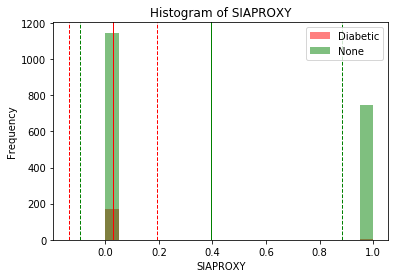

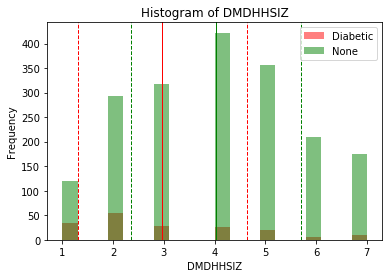

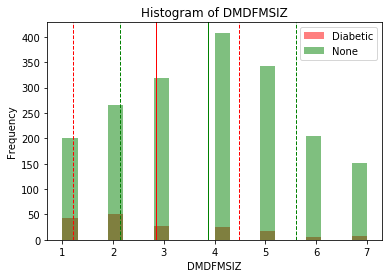

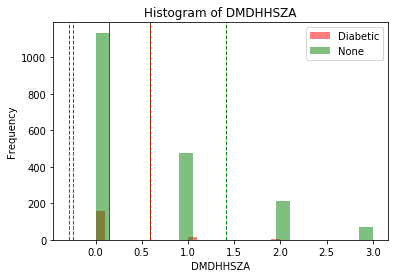

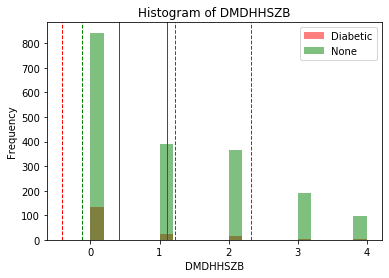

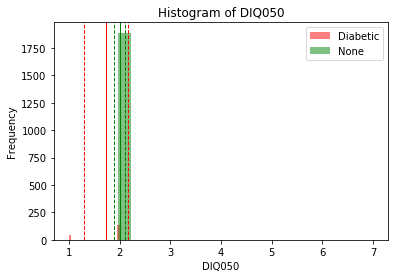

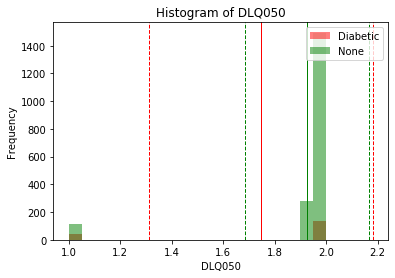

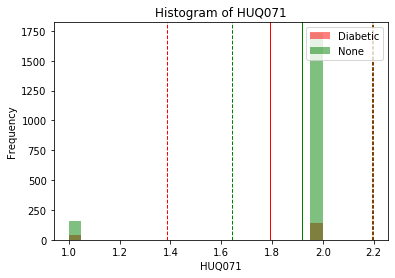

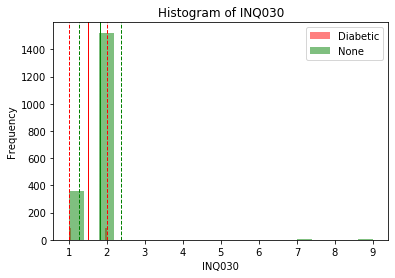

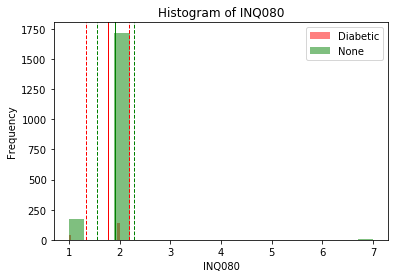

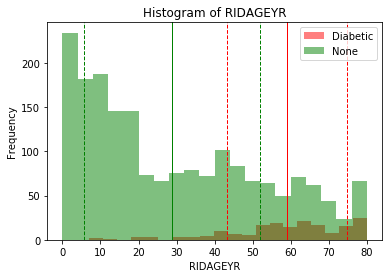

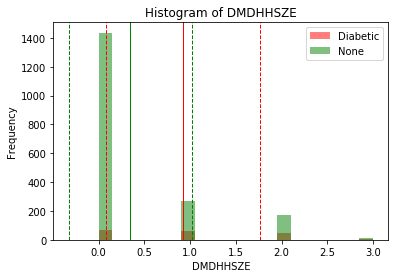

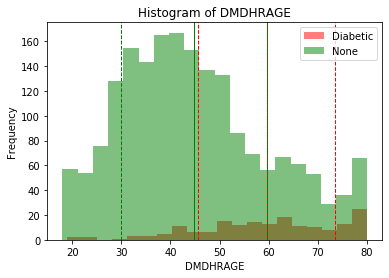

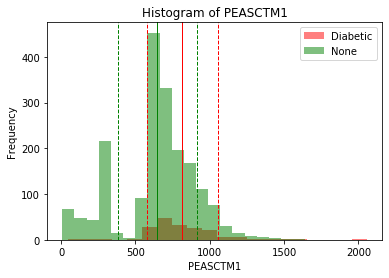

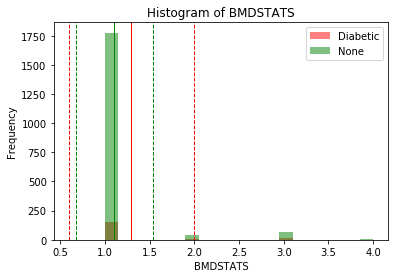

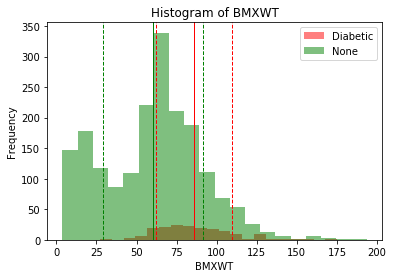

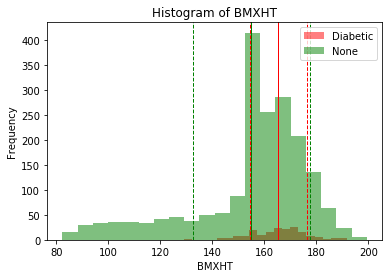

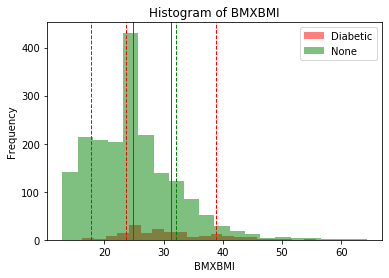

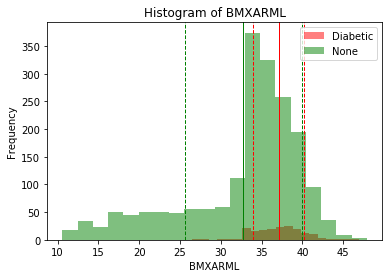

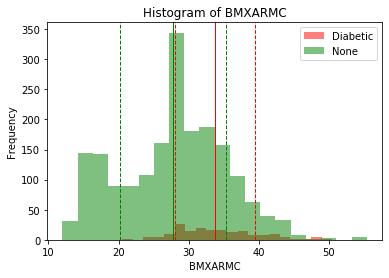

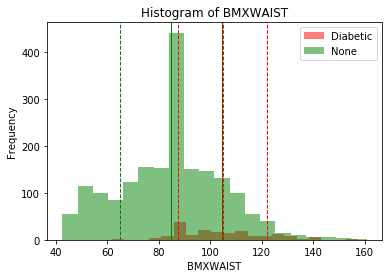

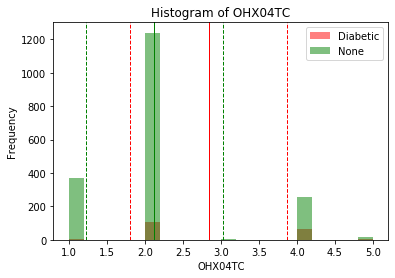

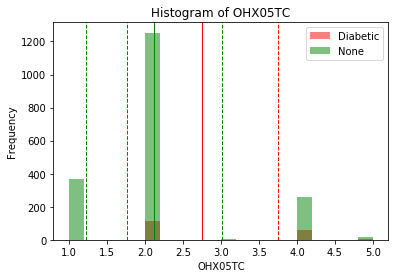

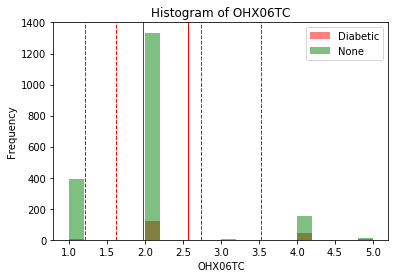

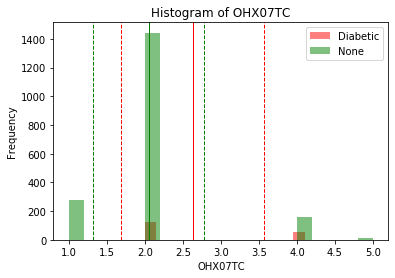

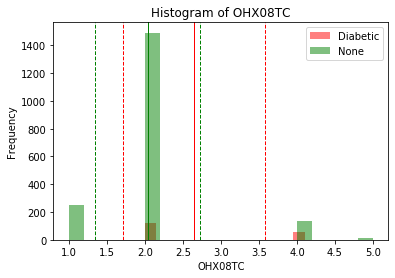

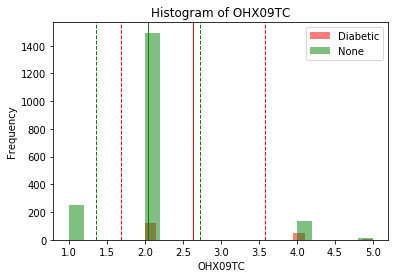

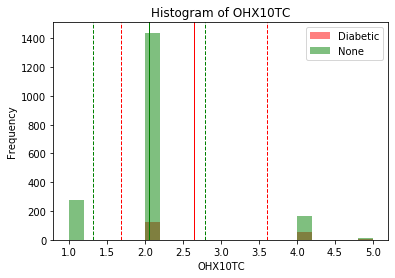

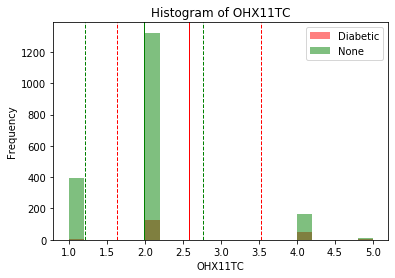

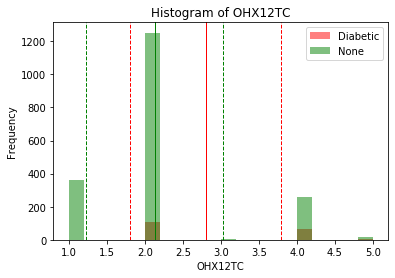

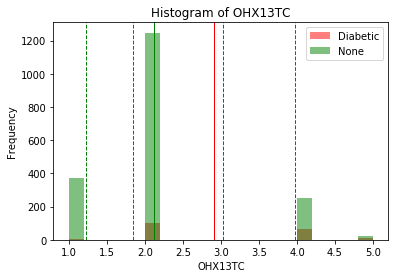

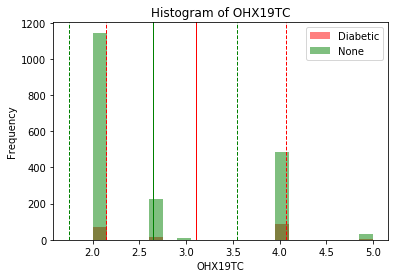

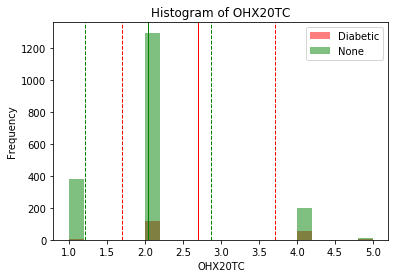

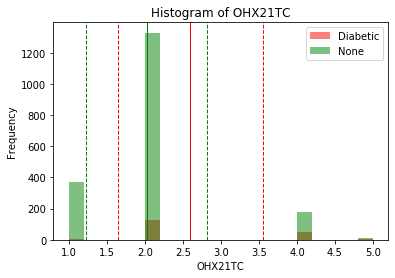

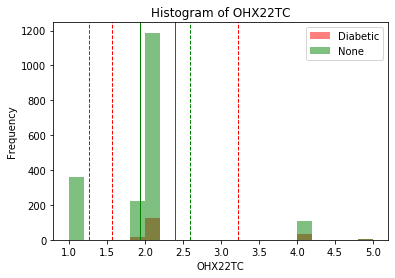

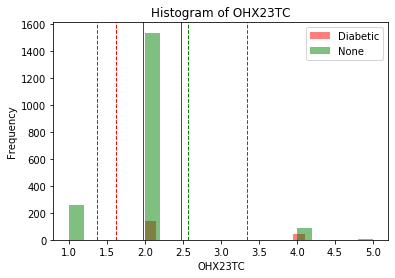

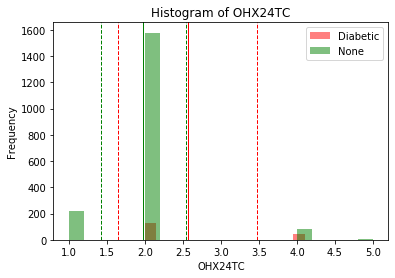

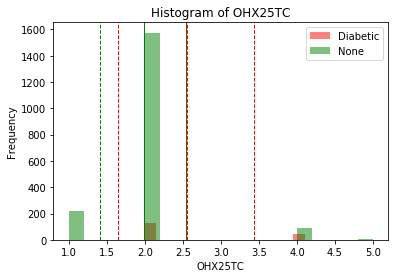

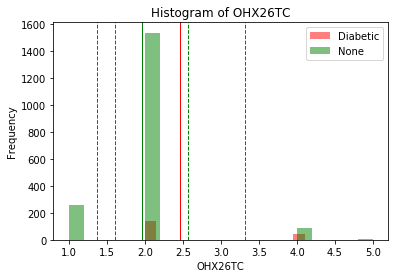

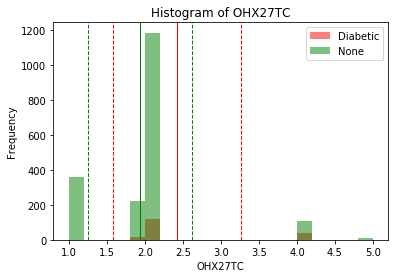

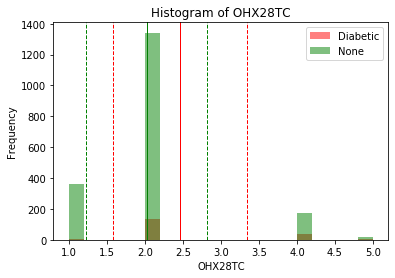

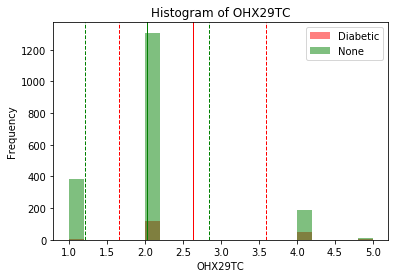

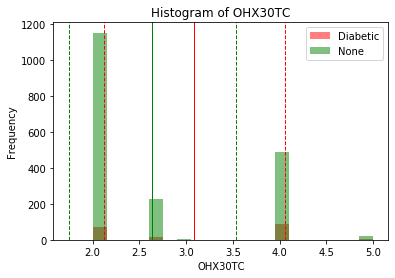

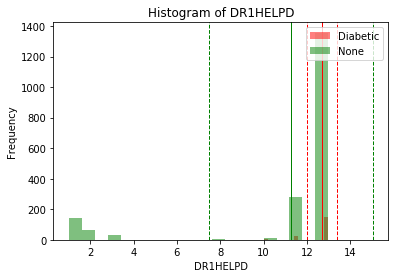

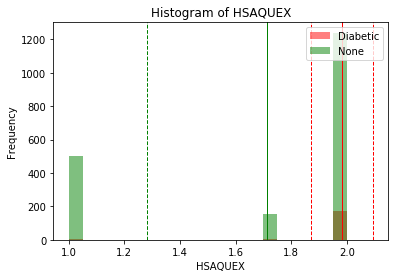

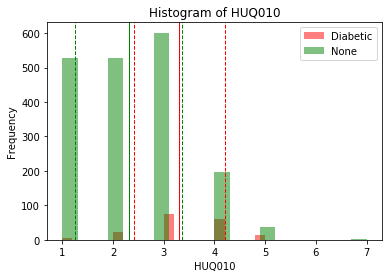

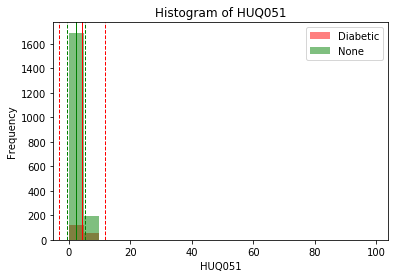

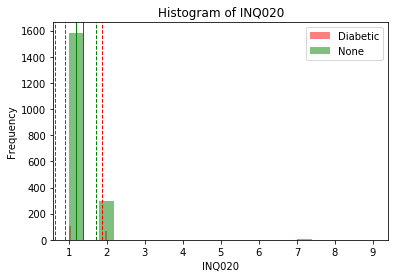

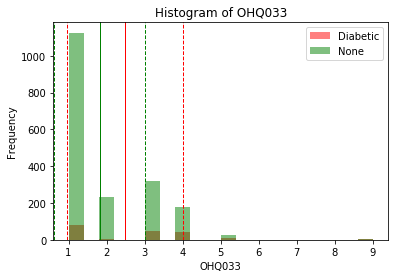

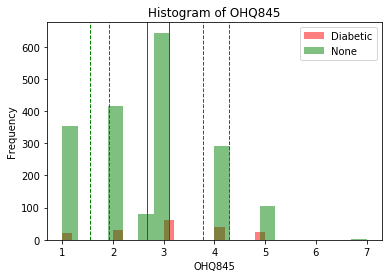

In [0]:
# # Check distributions between Diabetic and Non-diabetic of features
# import matplotlib.pyplot as plt
# %matplotlib inline

# # loop thru each feature
# for feature in df2:

#   # exclude label
#   if feature == 'DIABETIC':
#     continue

#   # store diabetic/non-diabetic in separate variables
#   pos = df2[df2['DIABETIC']==1][feature].values
#   neg = df2[df2['DIABETIC']==0][feature].values

#   # plot title and axis
#   plt.title('Histogram of ' + feature)
#   plt.xlabel(feature)
#   plt.ylabel('Frequency')

#   # plot histograms
#   plt.hist(pos, bins=20, alpha=0.5, label='Diabetic', color='r')
#   plt.hist(neg, bins=20, alpha=0.5, label='None', color='g')

#   # plot means and stds
#   plt.axvline(pos.mean(), color='r', linewidth=1)
#   plt.axvline(neg.mean(), color='g', linewidth=1)
#   plt.axvline(pos.mean()-pos.std(), color='r', linewidth=1, linestyle='--')
#   plt.axvline(neg.mean()-neg.std(), color='g', linewidth=1, linestyle='--')
#   plt.axvline(pos.mean()+pos.std(), color='r', linewidth=1, linestyle='--')
#   plt.axvline(neg.mean()+neg.std(), color='g', linewidth=1, linestyle='--')

#   # display plot
#   plt.legend(loc='upper right')
#   plt.show()

In [0]:
# # Hand pick best features based on exploratory analysis above
# column_lst = ['SIAPROXY','DMDHHSIZ','RIDAGEYR','DMDHHSZE','DMDHRAGE','PEASCTM1','BMXWT','BMXHT','BMXBMI','BMXARML','BMXARMC','BMXWAIST','HUQ010','DIQ050','DIABETIC']
# column_lst2 = ['RIDAGEYR','DMDHRAGE','PEASCTM1','BMXWT','BMXHT','BMXBMI','BMXARML','BMXARMC','BMXWAIST','DIABETIC']
# df3 = df2[column_lst]
# df3

,SIAPROXY,DMDHHSIZ,RIDAGEYR,DMDHHSZE,DMDHRAGE,PEASCTM1,BMXWT,BMXHT,BMXBMI,BMXARML,BMXARMC,BMXWAIST,HUQ010,DIQ050,DIABETIC
0,0,5,18,0,55,790.000000,59.2,171.000000,20.200000,36.0,25.5,75.500000,1.0,2.000000,0.0
1,0,6,57,1,27,663.000000,61.8,171.000000,21.100000,35.2,26.3,90.700000,3.0,2.000000,0.0
2,0,3,29,0,29,563.000000,63.1,169.000000,22.100000,35.0,28.0,81.200000,1.0,2.000000,0.0
3,1,5,0,0,33,137.000000,6.8,155.971535,25.438049,13.6,13.9,86.558498,1.0,1.978894,0.0
4,0,6,61,2,52,708.000000,65.8,174.200000,21.700000,36.8,29.6,77.200000,2.0,2.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2064,0,4,48,0,48,603.000000,58.0,156.000000,23.800000,34.9,28.1,79.400000,2.0,2.000000,0.0
2065,0,4,18,0,38,661.599483,60.7,186.300000,17.500000,38.6,25.9,72.600000,2.0,2.000000,0.0
2066,0,5,41,0,41,606.000000,74.7,172.800000,25.000000,36.2,33.1,93.400000,2.0,2.000000,0.0
2067,0,5,24,0,50,738.000000,59.5,156.500000,24.300000,32.5,29.2,78.100000,3.0,2.000000,0.0


In [0]:
# Preprocess data again and split into X,y
from sklearn import preprocessing

# Function to preprocess given df and return X,y
def preprocess_df2(input_df):

  # # Balance dataset
  # pos = input_df[input_df['DIABETIC']==1]
  # neg = input_df[input_df['DIABETIC']==0]
  # neg = neg.sample(n=2*len(pos), random_state=42)

  # new_df = pd.concat([pos, neg],axis=0)
  # random.seed(42)
  # new_df = new_df.reindex(np.random.permutation(new_df.index))

  new_df = input_df

  scaler = preprocessing.StandardScaler()

  # Separate features and labels
  X = new_df.drop('DIABETIC', axis=1)
  y = new_df['DIABETIC']

  # Standardize X
  X = scaler.fit_transform(X)

  X = np.asarray(X)
  y = np.asarray(y)
  # y = np.asarray(y).reshape(-1,1)

  return X,y

In [0]:
# Final X,y used for models
X, y = preprocess_df2(df2)

In [0]:
print(X.shape)
print(y.shape)

(2069, 99)
(2069,)


In [0]:
# Define a function that outputs a column list (potential set of features) with given correlation
# Used for Q3.3 table

def create_feature_set(input_df, correlation):

  # Find corr with label
  corr = input_df[input_df.columns[0:]].corr()['DIABETIC']
  corr_neg = corr[corr < -1*correlation]
  corr_pos = corr[corr > correlation]
  corr_df = pd.concat([corr_neg, corr_pos],axis=0)

  # Store corr_df in list of columns
  column_lst = list(corr_df.index)
  if 'DIQ010' in column_lst:
    column_lst.remove('DIQ010') # Remove this (doctors says if you have diabetes)
  # if 'DIQ050' in column_lst:
  #   column_lst.remove('DIQ050') # Remove this (corresponds to if person is taking insulin)

  # output_df = input_df[column_lst]

  return column_lst

In [0]:
# Create 2 more potential feature sets with different correlations
column_lst2 = create_feature_set(df1, 0.01)
column_lst3 = create_feature_set(df1, 0.2)

X2, y2 = preprocess_df2(df1[column_lst2])
X3, y3 = preprocess_df2(df1[column_lst3])

In [0]:
print(X2.shape)
print(X3.shape)

(2069, 335)
(2069, 40)


In [0]:
# Method to preprocess new input dfs for predicting/test
def transform_df(input_df, column_lst, final_binary_lst, fill_dict):

  if 'DIABETIC' in column_lst:
    column_lst.remove('DIABETIC')
  if 'DIABETIC' in final_binary_lst:
    final_binary_lst.remove('DIABETIC')

  # Feature selection
  # output_df = input_df[column_lst].dropna()
  output_df = input_df[column_lst]

  # Fill missing values
  # for i in range(len(output_df.columns)):
  #   try:
  #     output_df[output_df.columns[i]].fillna(fill_lst[i],inplace=True)
  #   except:
  #     # output_df[output_df.columns[i]].fillna('S',inplace=True)
  #     continue

  for col in output_df.columns:
    output_df[col].fillna(fill_dict[col],inplace=True)

  # Binary encode 
  for binary_col in final_binary_lst:
    try:
      output_df = convertToBinary(output_df, binary_col)
    except:
      continue
  
  # Standardize X
  from sklearn import preprocessing
  scaler = preprocessing.StandardScaler()
  X = scaler.fit_transform(output_df)
  X = np.asarray(X)

  return X

In [0]:
# Test above function
sample_df = df.copy().drop('DIABETIC',axis=1)
X_sample = transform_df(sample_df, column_lst, final_binary_lst, fill_dict)
print(X_sample.shape)

(2070, 99)


/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [0]:
# # Function to split data into train and test sets
# def split_train_test(data, test_ratio, random_seed=42):

#   np.random.seed(random_seed)
#   shuffled_indices = np.random.permutation(len(data))
#   test_set_size = int(len(data) * test_ratio)
#   test_indices = shuffled_indices[:test_set_size]
#   train_indices = shuffled_indices[test_set_size:]

#   try:
#     return data.iloc[train_indices], data.iloc[test_indices]
#   except:
#     return data[train_indices], data[test_indices]

## **Modeling**

In this section, you are tasked with building a Decision Tree classifier to predict whether or not a patient has diabetes. The overall goal of this exercise is to investigate the dataset and develop features that would improve your model performance.

To help with this process, we have provided the structure for two helper functions. These functions will help in tuning your model as well as validating your model's performance.

Complete these two functions.



In [0]:
import random
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

def cross_validated_accuracy(DecisionTreeClassifier, X, y, num_trials, num_folds, random_seed):
  # random.seed(random_seed)
  """
   Args:
        DecisionTreeClassifier: An Sklearn DecisionTreeClassifier (e.g., created by "tree.DecisionTreeClassifier(criterion='entropy')")
        X: Input features
        y: Labels
        num_trials: Number of trials to run of cross validation
        num_folds: Number of folds (the "k" in "k-folds")
        random_seed: Seed for uniform execution (Do not change this) 

    Returns:
        cvScore: The mean accuracy of the cross-validation experiment

    Notes:
        1. You may NOT use the cross-validation functions provided by Sklearn
  """

  ## TODO ##

  # Combine X,y
  X = np.array(X)
  y = np.array(y)
  dataset = np.concatenate((X,y.reshape(-1,1)),axis=1)
  # Store each cv score in list
  scores = []

  # Loop through trials
  for i in range(num_trials):
    # Shuffle dataset
    # random.seed(random_seed)
    # random.shuffle(dataset)
    np.random.shuffle(dataset)
    
    # data_split = []
    # data_copy = list(dataset)
    # fold_size = int(len(dataset) / num_folds)
    # test_size = 1 / num_folds

    # for j in range(num_folds):
    #   fold = []

    #   while len(fold) < fold_size:
    #     index = random.randrange(len(data_copy))
    #     fold.append(data_copy.pop(index))

    #   data_split.append(fold)

    # data_split = np.array(data_split)

    # Split dataset into folds
    data_split = np.array_split(dataset, num_folds)

    # Loop through folds
    for k in range(len(data_split)):
      
      # Test set
      test_set = data_split[k]

      # Train set
      train_lst = []
      for i in range(len(data_split)):
        if i != k:
          train_lst.append(data_split[i])
      train_set = np.concatenate(train_lst,axis=0)

      # Split into X,y
      X_train = train_set[:,:-1]
      y_train = train_set[:,-1]
      X_test = test_set[:,:-1]
      y_test = test_set[:,-1]

      # Use clf from parameter and record score
      dtree = DecisionTreeClassifier
      dtree.fit(X_train,y_train)
      y_pred = dtree.predict(X_test)

      scores.append(accuracy_score(y_test,y_pred))

  # Average
  cvScore = np.mean(scores)

  # Confidence Interval (99%)
  x_bar = np.mean(scores)
  S = np.std(scores)
  n = len(scores)
  t = 2.626
  
  endpoint = t * (S / np.sqrt(n))

  return cvScore, endpoint

In [0]:
# Test above function
from sklearn import tree

dtreetest = tree.DecisionTreeClassifier(criterion='entropy', random_state=42, class_weight='balanced')
cross_validated_accuracy(dtreetest, X, y, 10, 10, 42)

(0.918947282022419, 0.004488092788926811)

In [0]:
import random
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

def automatic_dt_pruning(DecisionTreeClassifier, X, y, num_trials, num_folds, random_seed):
  random.seed(random_seed)
  """
  Returns the pruning parameter (i.e., ccp_alpha) with the highest cross-validated accuracy

  Args:
        DecisionTreeClassifier  : An Sklearn DecisionTreeClassifier (e.g., created by "tree.DecisionTreeClassifier(criterion='entropy')")      
        X (Pandas.DataFrame)    : Input Features
        y (Pandas.Series)       : Labels
        num_trials              : Number of trials to run of cross validation
        num_folds               : Number of folds for cross validation (The "k" in "k-folds") 
        random_seed             : Seed for uniform execution (Do not change this)


    Returns:
        ccp_alpha : Tuned pruning paramter with highest cross-validated accuracy

    Notes:
        1. Don't change any other Decision Tree Classifier parameters other than ccp_alpha
        2. Use the cross_validated_accuracy function you implemented to find the cross-validated accuracy

  """

  ## TODO ##

  X = np.array(X)
  y = np.array(y)

  dtree = DecisionTreeClassifier
  path = dtree.cost_complexity_pruning_path(X, y)
  ccp_alphas, impurities = path.ccp_alphas, path.impurities
  # print(ccp_alphas)

  scores = {}
  for ccp_alpha in ccp_alphas[1:-1]:
    clf = tree.DecisionTreeClassifier(criterion='entropy', random_state=random_seed, class_weight='balanced', ccp_alpha=ccp_alpha)
    cvScore, endpoint = cross_validated_accuracy(clf, X, y, num_trials, num_folds, random_seed)
    scores[ccp_alpha] = cvScore
    # print(str(ccp_alpha) + ' ' + str(cvScore))

  # # Record scores in dict
  # scores = {}
  # # List of ccp_alphas to try
  # ccp_alphas = np.linspace(0.01, 0.05, 20)

  # # Loop through ccp_alpha
  # for ccp_alpha in ccp_alphas:
  #   # Initiate clf and record k-fold cv score
  #   clf = tree.DecisionTreeClassifier(random_state=random_seed, ccp_alpha=ccp_alpha)
  #   cvScore, endpoint = cross_validated_accuracy(clf, X, y, num_trials, num_folds, random_seed)
  #   scores[ccp_alpha] = cvScore
  
  # Return key with max value
  ccp_alpha = max(scores, key=scores.get)

  return ccp_alpha

In [0]:
# Test above function
from sklearn import tree

dtreetest2 = tree.DecisionTreeClassifier(criterion='entropy', random_state=42, class_weight='balanced')
automatic_dt_pruning(dtreetest2, X, y, 10, 10, 42)

0.0009502008233250251

## **Tuning and Testing**

With the helper functions and your processed dataset, build a Decision Tree classifier to classify Diabetic patients and tune it to maximize model performance.

Once you are done with your modeling process, test your model on the test dataset and output your predictions in a file titled "cis519_hw1_predictions.csv", with one row per prediction.

In [0]:
from sklearn.model_selection import train_test_split

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

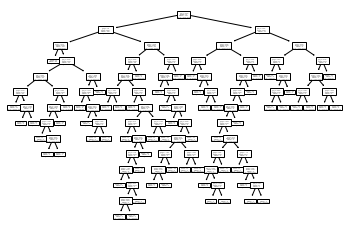

In [0]:
from sklearn import tree

## TODO ##

# Train tree
clf = tree.DecisionTreeClassifier(criterion='entropy', random_state=42, class_weight='balanced')
clf = clf.fit(X_train, y_train)

# Plot tree
tree.plot_tree(clf)

print()

In [0]:
# Measure training error
y_train_pred = clf.predict(X_train)
print('Train accuracy (Unpruned): ' + str(accuracy_score(y_train,y_train_pred)))
print('-----')

NUM_TRIALS = 10
NUM_FOLDS = 10

# Estimate test error using k-fold cv 
cvScore, endpoint = cross_validated_accuracy(clf, X_train, y_train, NUM_TRIALS, NUM_FOLDS, random_seed=42)
print('CV estimate of test error (Unpruned): ' + str(cvScore))
print('Confidence Interval: [' + str(cvScore - endpoint) + ', ' + str(cvScore + endpoint) + ']')
print('-----')

# Measure test error
y_pred = clf.predict(X_test)
print('Test accuracy (Unpruned): ' + str(accuracy_score(y_test,y_pred)))
print('-----')

Train accuracy (Unpruned): 1.0
-----
CV estimate of test error (Unpruned): 0.91181561302682
Confidence Interval: [0.9064080941737699, 0.9172231318798701]
-----
Test accuracy (Unpruned): 0.9130434782608695
-----


In [0]:
# Test F1 score
from sklearn.metrics import f1_score
f1_score(y_test,y_pred)

0.5714285714285714

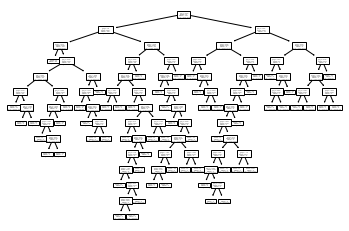

In [0]:
# Get optimal ccp_alpha
ccp_alpha = automatic_dt_pruning(clf, X_train, y_train, NUM_TRIALS, NUM_FOLDS, random_seed=42)

# Train pruned tree
clf_pruned = tree.DecisionTreeClassifier(random_state=42, criterion='entropy', ccp_alpha=ccp_alpha, class_weight='balanced')
clf_pruned = clf_pruned.fit(X_train, y_train)

# Plot pruned tree
tree.plot_tree(clf_pruned)

print()

In [0]:
# Measure training error
y_train_pred_pruned = clf_pruned.predict(X_train)
print('Train accuracy (Pruned): ' + str(accuracy_score(y_train,y_train_pred_pruned)))
print('-----')

NUM_TRIALS = 10
NUM_FOLDS = 10

# Estimate test error using k-fold cv
cvScore_pruned, endpoint_pruned = cross_validated_accuracy(clf_pruned, X_train, y_train, NUM_TRIALS, NUM_FOLDS, 42)
print('CV estimate of test error (Pruned): ' + str(cvScore_pruned))
print('Confidence Interval: [' + str(cvScore_pruned - endpoint_pruned) + ', ' + str(cvScore_pruned + endpoint_pruned) + ']')
print('-----')

# Measure test error
y_pred_pruned = clf_pruned.predict(X_test)
print('Test accuracy (Pruned): ' + str(accuracy_score(y_test,y_pred_pruned)))
print('-----')

Train accuracy (Pruned): 0.9993093922651933
-----
CV estimate of test error (Pruned): 0.9138874521072796
Confidence Interval: [0.9075369677236348, 0.9202379364909244]
-----
Test accuracy (Pruned): 0.9259259259259259
-----


In [0]:
# Test F1 score
from sklearn.metrics import f1_score
f1_score(y_test,y_pred_pruned)

0.5740740740740741

## Training/Testing Other Feature Sets

In [0]:
from sklearn.model_selection import train_test_split

# Train test split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=42)

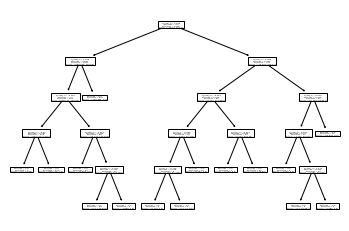

In [0]:
from sklearn import tree

# Train tree
clf2 = tree.DecisionTreeClassifier(random_state=42, criterion='entropy', class_weight='balanced')
clf2 = clf2.fit(X2_train, y2_train)

# Plot tree
tree.plot_tree(clf2)

print()

In [0]:
# Measure training error
y2_train_pred = clf2.predict(X2_train)
print('Train accuracy (Unpruned): ' + str(accuracy_score(y2_train,y2_train_pred)))
print('-----')

NUM_TRIALS = 10
NUM_FOLDS = 10

# Estimate test error using k-fold cv 
cvScore2, endpoint2 = cross_validated_accuracy(clf2, X2_train, y2_train, NUM_TRIALS, NUM_FOLDS, random_seed=42)
print('CV estimate of test error (Unpruned): ' + str(cvScore2))
print('Confidence Interval: [' + str(cvScore2 - endpoint2) + ', ' + str(cvScore2 + endpoint2) + ']')
print('-----')

# Measure test error
y2_pred = clf2.predict(X2_test)
print('Test accuracy (Unpruned): ' + str(accuracy_score(y2_test,y2_pred)))
print('-----')

Train accuracy (Unpruned): 1.0
-----
CV estimate of test error (Unpruned): 0.9852926245210728
Confidence Interval: [0.9826577208734152, 0.9879275281687304]
-----
Test accuracy (Unpruned): 0.9855072463768116
-----


In [0]:
# Test F1 score
from sklearn.metrics import f1_score
f1_score(y_test,y2_pred)

0.9302325581395349

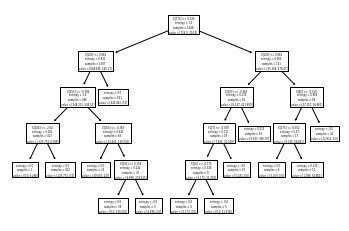

In [0]:
# Get optimal ccp_alpha
ccp_alpha2 = automatic_dt_pruning(clf2, X2_train, y2_train, NUM_TRIALS, NUM_FOLDS, random_seed=42)

# Train pruned tree
clf2_pruned = tree.DecisionTreeClassifier(random_state=42, criterion='entropy', ccp_alpha=ccp_alpha2,class_weight='balanced')
clf2_pruned = clf2_pruned.fit(X2_train, y2_train)

# Plot pruned tree
tree.plot_tree(clf2_pruned)

print()

In [0]:
# Measure training error
y2_train_pred_pruned = clf2_pruned.predict(X2_train)
print('Train accuracy (Pruned): ' + str(accuracy_score(y2_train,y2_train_pred_pruned)))
print('-----')

NUM_TRIALS = 10
NUM_FOLDS = 10

# Estimate test error using k-fold cv
cvScore2_pruned, endpoint2_pruned = cross_validated_accuracy(clf2_pruned, X2_train, y2_train, NUM_TRIALS, NUM_FOLDS, 42)
print('CV estimate of test error (Pruned): ' + str(cvScore2_pruned))
print('Confidence Interval: [' + str(cvScore2_pruned - endpoint2_pruned) + ', ' + str(cvScore2_pruned + endpoint2_pruned) + ']')
print('-----')

# Measure test error
y2_pred_pruned = clf2_pruned.predict(X2_test)
print('Test accuracy (Pruned): ' + str(accuracy_score(y2_test,y2_pred_pruned)))
print('-----')

Train accuracy (Pruned): 0.9979281767955801
-----
CV estimate of test error (Pruned): 0.9857035440613027
Confidence Interval: [0.9834178080326738, 0.9879892800899316]
-----
Test accuracy (Pruned): 0.9887278582930756
-----


In [0]:
# Test F1 score
from sklearn.metrics import f1_score
f1_score(y_test,y2_pred_pruned)

0.9457364341085271

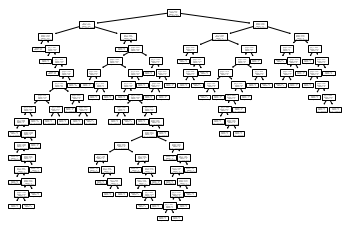

In [0]:
from sklearn import tree

# Train tree
clf3 = tree.DecisionTreeClassifier(random_state=42, criterion='entropy', class_weight='balanced')
clf3 = clf3.fit(X3_train, y3_train)

# Plot tree
tree.plot_tree(clf3)

print()

In [0]:
# Measure training error
y3_train_pred = clf3.predict(X3_train)
print('Train accuracy (Unpruned): ' + str(accuracy_score(y3_train,y3_train_pred)))
print('-----')

NUM_TRIALS = 10
NUM_FOLDS = 10

# Estimate test error using k-fold cv 
cvScore3, endpoint3 = cross_validated_accuracy(clf3, X3_train, y3_train, NUM_TRIALS, NUM_FOLDS, random_seed=42)
print('CV estimate of test error (Unpruned): ' + str(cvScore3))
print('Confidence Interval: [' + str(cvScore3 - endpoint3) + ', ' + str(cvScore3 + endpoint3) + ']')
print('-----')

# Measure test error
y3_pred = clf3.predict(X3_test)
print('Test accuracy (Unpruned): ' + str(accuracy_score(y3_test,y3_pred)))
print('-----')

Train accuracy (Unpruned): 1.0
-----
CV estimate of test error (Unpruned): 0.9129147509578545
Confidence Interval: [0.9071997153704108, 0.9186297865452981]
-----
Test accuracy (Unpruned): 0.9210950080515298
-----


In [0]:
# Test F1 score
from sklearn.metrics import f1_score
f1_score(y_test,y3_pred)

0.6016260162601625

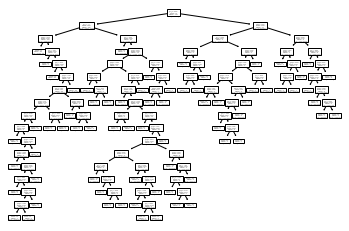

In [0]:
# Get optimal ccp_alpha
ccp_alpha3 = automatic_dt_pruning(clf3, X3_train, y3_train, NUM_TRIALS, NUM_FOLDS, random_seed=42)

# Train pruned tree
clf3_pruned = tree.DecisionTreeClassifier(random_state=42, criterion='entropy', ccp_alpha=ccp_alpha3, class_weight='balanced')
clf3_pruned = clf3_pruned.fit(X3_train, y3_train)

# Plot pruned tree
tree.plot_tree(clf3_pruned)

print()

In [0]:
# Measure training error
y3_train_pred_pruned = clf3_pruned.predict(X3_train)
print('Train accuracy (Pruned): ' + str(accuracy_score(y3_train,y3_train_pred_pruned)))
print('-----')

NUM_TRIALS = 10
NUM_FOLDS = 10

# Estimate test error using k-fold cv
cvScore3_pruned, endpoint3_pruned = cross_validated_accuracy(clf3_pruned, X3_train, y3_train, NUM_TRIALS, NUM_FOLDS, 42)
print('CV estimate of test error (Pruned): ' + str(cvScore3_pruned))
print('Confidence Interval: [' + str(cvScore3_pruned - endpoint3_pruned) + ', ' + str(cvScore3_pruned + endpoint3_pruned) + ']')
print('-----')

# Measure test error
y3_pred_pruned = clf3_pruned.predict(X3_test)
print('Test accuracy (Pruned): ' + str(accuracy_score(y3_test,y3_pred_pruned)))
print('-----')

Train accuracy (Pruned): 0.9993093922651933
-----
CV estimate of test error (Pruned): 0.9158031609195403
Confidence Interval: [0.9103147962581737, 0.9212915255809069]
-----
Test accuracy (Pruned): 0.9243156199677939
-----


In [0]:
# Test F1 score
from sklearn.metrics import f1_score
f1_score(y_test,y3_pred_pruned)

0.6412213740458016

In [0]:
# Check ccp alpha values
print(ccp_alpha)
print(ccp_alpha2)
print(ccp_alpha3)

0.0017162496000342673
0.0053723426878767785
0.0013713371217258551


## Making Predictions

In [0]:
# Read data and save as pd dataframe
unlabeled_csv_path = '/content/drive/My Drive/hw1-NHANES-diabetes-test-unlabeled.csv'
unlabeled_df = pd.read_csv(unlabeled_csv_path)
display(unlabeled_df.head(10))
print(unlabeled_df.shape)

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,DMQMILIZ,DMQADFC,DMDBORN4,DMDCITZN,DMDYRSUS,DMDEDUC3,DMDEDUC2,DMDMARTL,RIDEXPRG,SIALANG,SIAPROXY,SIAINTRP,FIALANG,FIAPROXY,FIAINTRP,MIALANG,MIAPROXY,MIAINTRP,AIALANGA,DMDHHSIZ,DMDFMSIZ,DMDHHSZA,DMDHHSZB,DMDHHSZE,DMDHRGND,DMDHRAGE,DMDHRBR4,DMDHREDU,DMDHRMAR,DMDHSEDU,...,SXQ272,SXQ280,SXQ292,SXQ294,WHD010,WHD020,WHQ030,WHQ040,WHD050,WHQ060,WHQ070,WHD080A,WHD080B,WHD080C,WHD080D,WHD080E,WHD080F,WHD080G,WHD080H,WHD080I,WHD080J,WHD080K,WHD080M,WHD080N,WHD080O,WHD080P,WHD080Q,WHD080R,WHD080S,WHD080T,WHD080U,WHD080L,WHD110,WHD120,WHD130,WHD140,WHQ150,WHQ030M,WHQ500,WHQ520
0,77252,8,2,2,12,NaN,4,4,2.0,153.0,NaN,NaN,1,1.0,NaN,6.0,NaN,NaN,NaN,1,1.0,2,1.0,2.0,2.0,1.0,2.0,2.0,1.0,3,3,0,2,0,2,36,1.0,4.0,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,3.0
1,79020,8,2,1,0,7.0,3,3,1.0,8.0,NaN,NaN,1,1.0,NaN,NaN,NaN,NaN,NaN,1,1.0,2,1.0,2.0,2.0,NaN,NaN,NaN,NaN,5,4,2,0,0,2,20,1.0,3.0,6.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,76059,8,2,1,21,NaN,4,4,1.0,NaN,2.0,NaN,1,1.0,NaN,NaN,3.0,6.0,NaN,1,2.0,2,1.0,2.0,2.0,1.0,2.0,2.0,1.0,2,2,0,0,0,1,21,1.0,3.0,6.0,NaN,...,2.0,2.0,1.0,NaN,72.0,180.0,3.0,1.0,180.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,188.0,20.0,NaN,NaN,NaN
3,78115,8,2,1,11,NaN,3,3,2.0,143.0,NaN,NaN,1,1.0,NaN,5.0,NaN,NaN,NaN,1,1.0,2,1.0,2.0,2.0,1.0,2.0,2.0,1.0,5,5,1,2,0,1,42,1.0,5.0,1.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,2.0
4,75761,8,2,2,6,NaN,4,4,2.0,75.0,NaN,NaN,1,1.0,NaN,0.0,NaN,NaN,NaN,1,1.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,5,0,2,0,2,58,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,83514,8,2,2,53,NaN,1,1,1.0,NaN,2.0,NaN,2,1.0,7.0,NaN,3.0,1.0,NaN,2,2.0,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,7,7,2,1,0,2,21,2.0,2.0,1.0,2.0,...,NaN,NaN,NaN,9.0,61.0,130.0,1.0,3.0,156.0,1.0,NaN,10.0,NaN,12.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0,NaN,41.0,NaN,43.0,NaN,45.0,46.0,NaN,NaN,105.0,115.0,9999.0,156.0,52.0,NaN,NaN,NaN
6,81188,8,2,2,14,NaN,1,1,2.0,171.0,NaN,NaN,1,1.0,NaN,8.0,NaN,NaN,NaN,1,1.0,2,1.0,2.0,2.0,1.0,2.0,2.0,1.0,7,7,0,3,0,1,42,2.0,2.0,1.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,3.0
7,76227,8,2,2,26,NaN,3,3,1.0,NaN,2.0,NaN,1,1.0,NaN,NaN,4.0,1.0,2.0,1,2.0,2,1.0,2.0,2.0,1.0,2.0,2.0,1.0,2,2,0,0,0,1,29,1.0,4.0,1.0,4.0,...,2.0,NaN,NaN,3.0,62.0,370.0,1.0,2.0,415.0,2.0,1.0,NaN,11.0,NaN,NaN,14.0,15.0,NaN,NaN,NaN,NaN,NaN,34.0,NaN,41.0,NaN,43.0,44.0,45.0,46.0,NaN,NaN,NaN,NaN,NaN,415.0,24.0,NaN,NaN,NaN
8,82647,8,2,2,10,NaN,4,4,1.0,126.0,NaN,NaN,1,1.0,NaN,5.0,NaN,NaN,NaN,1,1.0,2,1.0,2.0,2.0,1.0,2.0,2.0,1.0,6,5,1,2,0,2,28,1.0,4.0,1.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,4.0,1.0
9,80395,8,2,1,9,NaN,1,1,1.0,110.0,NaN,NaN,1,1.0,NaN,2.0,NaN,NaN,NaN,1,1.0,2,1.0,2.0,2.0,1.0,2.0,2.0,1.0,6,6,1,2,0,2,42,NaN,5.0,1.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,2.0,2.0


(2035, 1811)


In [0]:
# Preprocess unlabeled data
unlabeled_data = transform_df(unlabeled_df, column_lst2, final_binary_lst, fill_dict)
print(unlabeled_data.shape)

(2035, 335)


/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [0]:
# Predict labels
y_pred_new = clf2_pruned.predict(unlabeled_data)

In [0]:
# Save to csv file
np.savetxt('cis519_hw1_predictions.csv', y_pred_new, delimiter='\n')

In [0]:
# Read output
test_new_pred = pd.read_csv('cis519_hw1_predictions.csv')
test_new_pred

,0.000000000000000000e+00
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
2029,0.0
2030,0.0
2031,1.0
2032,1.0


In [0]:
# Value counts
test_new_pred['0.000000000000000000e+00'].value_counts()

0.0    1861
1.0     173
Name: 0.000000000000000000e+00, dtype: int64